In [2]:
import nltk # Python library for NLP
import matplotlib.pyplot as plt 
import random
import pandas as pd

Load Dataset

In [6]:
data = pd.read_csv('drive/MyDrive/spam.csv',encoding="ISO-8859-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Data Preprocessing

In [ ]:
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [ ]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data.rename(columns={"v1": "target","v2": "msg"},inplace=True)
ndata = data.copy()
ndata.head()

,target,msg,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
ndata.target.value_counts()

ham     4825
spam     747
Name: target, dtype: int64

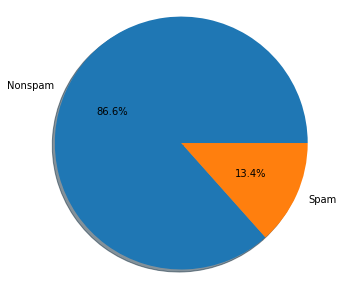

In [ ]:
fig = plt.figure(figsize=(5,5))

labels = 'Nonspam','Spam'

sizes = [ndata.target.value_counts().ham,ndata.target.value_counts().spam]

plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=True,startangle=0)

plt.axis('equal')

plt.show()

Tokenization and Stemming

In [9]:
import re 
import string 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

In [14]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopword_eng = stopwords.words('english')
print(stopword_eng)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [17]:
corpus = []

for i in range(len(ndata)):
    review = re.sub('[^a-zA-Z]',' ',data['msg'][i])
    review = review.split()
    # review = [lemmatizer.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
    review = [stemmer.stem(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [18]:
corpus

['Go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'Ok lar joke wif u oni',
 'free entri wkli comp win FA cup final tkt st may text FA receiv entri question std txt rate T C appli',
 'U dun say earli hor U c alreadi say',
 'nah I think goe usf live around though',
 'freemsg hey darl week word back I like fun still Tb ok xxx std chg send rcv',
 'even brother like speak they treat like aid patent',
 'As per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner As valu network custom select receivea prize reward To claim call claim code KL valid hour',
 'had mobil month U R entitl updat latest colour mobil camera free call the mobil updat Co free',
 'I gonna home soon want talk stuff anymor tonight k I cri enough today',
 'six chanc win cash from pound txt csh send cost p day day tsandc appli repli HL info',
 'urgent you week free membership prize jackpot txt word claim No T C www dbuk net lccltd pobo